출처: https://ysyblog.tistory.com/115
      
      ADP교재



## 일표본(단일표본) T-검정

* 단일모집단에서 관심이 있는 연속형 변수의 평균(mu) 값을 특정 기준값과 비교하고자 할 때 사용하는 검정방법
* 예를 들어 A과수원에서 생산되는 사과의 평균 무게가 200g인지 알려져 있을 때, 실제로 A 과수원에서 생산되는 전체 사과의 평균 무게가 200g인지 알아보고 싶은 경우에 일표본 t-검정을 수행할 수 있다.

* 종속변수는 연속형 변수여야 하며, 검증하고자 하는 기준값이 있어야 한다.

* 일표본 t-검정에서는 모집단의 구성요소들이 정규분포를 이룬다는 가정 하에 검정통계량의 값을 계산한다.
* 때문에 주어진 데이터가 n<30 이라서 중심극한정리를 따르지 않는다면, 정규성 검정이 필요하다.


In [3]:
data = [200, 210, 180, 190, 185, 170, 180, 180, 210, 180, 183, 191, 204, 201, 186]
# data가 30개 보다 적기 때문에 중심극한정리를 따르지 않는다.
# 때문에 정규성을 만족하는지 확인하기 위해 정규성검정을 실시해야 한다.


In [4]:
from scipy.stats import shapiro

shapiro(data) # (statistic, p-value)

# p-value가 유의수준 0.05보다 크기 때문에 귀무가설(주어진 데이터는 정규분포이다.)을 기각할 수 없다.
# 때문에 정규성을 만족하고, t-test를 수행할 수 있다고 본다.

(0.9217348098754883, 0.20472252368927002)

귀무가설 : 과수원 사과의 평균무게는 200g이다.

대립가설 : 과수원 사과의 평균무게는 200g이 아니다.(양측검정)

In [5]:
from scipy.stats import ttest_1samp

ttest_1samp(data, 200)

# 검정통계량(t값)은 -3.1563, 유의확률(p-value)은 0.007004이다.
# p-value가 유의수준 0.05보다 작기 때문에 귀무가설을 기각하고, "A 과수원에서 생산되는 사과의 평균무게는 200g이 아니다" 라는 결론을 낼 수 있다.

Ttest_1sampResult(statistic=-3.156271429370956, pvalue=0.007003780898109026)

## 대응표본 T-검정

* 단일 모집단에 대해 두번의 처리를 가했을 때, 두 개의 처리에 따른 평균의 차이를 비교하고자 할 때 사용하는 검정방법이다.

* 예를 들어 어느 기업에서 판매사원들의 역량 향상을 위해 두 가지 방법으로 직업교육을 실시하고 나서, 두 가지 교육방법에 따른 판매실적 평균에 차이가 있는지를 검정하고자 할 때 대응표본 T-검정을 사용할 수 있다. 이 때 "직업교육 방법"이 독립변수, 그에 따른 "판매실적"이 종속변수가 된다.

* 하나의 모집단에서 크기가 n개인 하나의 표본을 추출한 후, 표본 내의 개체들에 대해서 두번의 측정을 실시한다.

* 모집단과 표본은 하나씩이지만, 각 개체들에 대해 두 개씩의 관측값이 존재하므로 모수는 두 개이다.

* 대응표본 T-검정은 단일표본 T-검정과 마찬가지로 모집단의 관측값이 정규성을 만족해야한다. 일반적으로 표본의 크기가 충분히 클 때 중심극한정리에 따라 정규성을 만족한다고 볼 수 있다.

* 정규성 검정은 사전분포 - 사후분포 즉, 사전과 사후의 차이가 정규성을 만족하는지 검사한다.

* 종속변수는 연속형 변수여야 한다.

* 독립표본 t-검정 과는 달리, 집단 간 비교를 하는게 아니기 때문에 등분산 검정을 실행할 필요는 없다. 

https://junsik-hwang.tistory.com/14

예제 : 10명의 환자를 대상으로 수면영양제를 복용하기 전과 후의 수면시간을 측정하여 영양제의 효과가 있는지를 판단하고자 한다. 영양제 복죵 전과 후의 평균 수면시간에 차이가 있는지를 알아보는데, 단측검정을 수행하여 영양제 복용 후에 수면시간이 더 늘어났는지를 검정해보아라.

귀무가설(H0) : "수면영양제를 복용하기 전과 후의 평균 수면시간에는 차이가 없다.(D=0) #D는 Difference 차이를 뜻함.

대립가설(H1) : "수면영양제를 복용하기 전과 후의 평균 수면시간에는 차이는 0보다 작다.(D<0)

In [35]:
df = pd.DataFrame(data={'before':[7,3,4,5,2,1,6,6,5,4],'after':[8,4,5,6,2,3,6,8,6,5]})
df.head()

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2


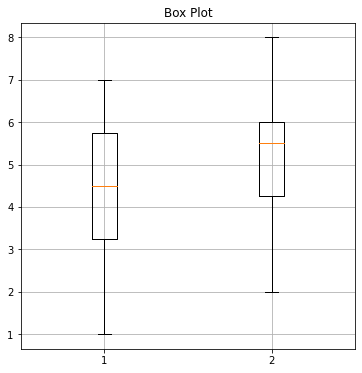

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.grid()
plt.boxplot([df['before'],df['after']])
plt.title('Box Plot')
plt.show()

In [24]:
from scipy.stats import shapiro
# 표본의 수가 30개 미만이기 때문에 중심극한정리를 만족하지 못한다. 따라서 정규성검정을 실시한다.
# 대응표본 T검정에서는 Pre에서 Post를 뺀 값을 가지고 정규성검정을 해야한다.
# https://m.blog.naver.com/y4769/220114688996

print('수면시간의 차이(D) 정규성검정: ',shapiro(df['before']-df['after']))

# p-value가 유의수준 0.05보다 작기 때문에 대립가설이 채택되어 위 데이터는 정규성을 만족하지 못한다.
# 따라서 원래는 대응표본 T-검정 대신 wilcoxon's signed rank test(윌콕슨부호순위검정)를 실시해야 하지만, 우선 정규성을 만족하는 것으로 가정하고 대응 표본 T-검정을 실시한다.

수면시간의 차이(D) 정규성검정:  (0.8148398399353027, 0.021947871893644333)


In [28]:
from scipy.stats import ttest_rel

ttest_rel(df['before'], df['after'])
# p-value가 0.00105이지만, 이는 양측검정을 가정한 p-value이다.
# 현재 검정은 단측검정이기 때문에 나누기 2를 해줘야 함.
# 최종 p-value는 0.000525이고, 유의수준 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.
# 따라서 "수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제 복용 후에 수면시간이 더 늘었다"라는 결론을 내릴 수 있다.

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

**대응표본 T-검정(정규성을 만족하지 못한다면?)**

출처:https://junsik-hwang.tistory.com/19?category=803034

In [31]:
from scipy.stats import wilcoxon
wilcoxon(df['before'], df['after'], zero_method='wilcox', alternative='less')

# p-value가 유의수준 0.05보다 작기 때문에 대립가설을 채택한다.
# 따라서 "수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제 복용 후에 수면시간이 더 늘었다"라는 결론을 내릴 수 있다.
# alternative 인자로는 'two-sided' , 'less', 'greater' 3가지가 있다.
# 'less' 로 설정한 이유는 수면시간 차이(before-after (==D))가 비교하고자 하는 값(0) 보다 작은지에 대하여 검정을 수행하기 때문이다.

WilcoxonResult(statistic=0.0, pvalue=0.00414960799764038)

## 독립표본 T-검정

독립표본 T-검정이란?
* 두 개의 독립된 모집단의 평균을 비교하고자 할 때 사용하는 검정방법이다.
* 예를 들어 성별에 따라 출근 준비시간에 차이가 있는지를 통계적으로 검정하기 위해서 독립표본 t-검정을 사용할 수 있다. 
이 때 그룹을 나누는 기준인 '성별'이 독립변수이고, 그에 따른 관측값인 '출근 준비시간'이 종속변수이다.
* 두 개의 모집단에서 크기가 n개인 표본을 가각 추출한 후 표본의 관측값들을 이용해 검정을 실시한다. 따라서 독립표본 t-검정에서는 모집단, 모수, 표본이 모두 두 개씩 존재한다.

독립표본 T-검정의 가정
* 두 모집단을 정규성을 만족해야 한다. 표본의 크기가 충분히 크다면 중심극한정리에 따라 정규성을 만족하낟고 볼 수 있다.
* 독립표본 T-검정에서 두 개의 모집단은 서로 독립적이어야 한다.
* 두 모집단의 분산잉 서로 같음을 의미하는 등분산성 가정을 만족해야한다. 등분산 가정은 비교하고자 하는 두 독립 딥잔의 모분산이 동일해야함을 의미한다. 이 가정을 확인하기 위햇 독립표본 T-검정 수행 과정에서 검정통계량을 계산하기 이전에 등분산 검정을 먼저 수행한다.
* 독립변수는 범주형, 종속변수는 연속형이어야 한다.

예제: A, B 두 지역의 겨울 낮 최고기온에 차이가 있는지를 알아보기 위해 약 10일 동안 두 지역의 낮 최고기온을 측정한 데이터로 독립표본 T-검정을 수행해보자.

귀무가설: A, B 두 지역에 따른 겨울 낮 최고기온은 차이가 없다.(mu1=mu2)

대립가설: A, B 두 지역에 따른 겨울 낮 최고기온은 차이가 있다.(mu1!=mu2)

In [39]:
df = pd.DataFrame(data={'A':[-1,0,3,4,1,3,3,1,1,3],'B':[6,6,8,8,11,11,10,8,8,9]})
df.head()

,A,B
0,-1,6
1,0,6
2,3,8
3,4,8
4,1,11


##### 정규성검정

In [40]:
from scipy.stats import shapiro

print(shapiro(df['A']))
print(shapiro(df['B']))

# 두 집단 모두 p-value가 유의수준 0.05보다 크기 때문에 정규성을 만족한다.

(0.900489330291748, 0.2218218445777893)
(0.9001172184944153, 0.21974670886993408)


##### 등분산성 검정

독립표본 T-검정을 실시하기에 앞서, 두 집단의 분산이 같은지 등분산검정을 실시해야한다.

귀무가설: 두 집단의 분산이 동일하다.

대립가설: 두 집단의 분산이 동일하지 않다.

In [43]:
from scipy.stats import levene

print(levene(df['A'], df['B']))

from scipy.stats import bartlett

print(bartlett(df['A'], df['B']))

# 레벤과 바틀렛 검정 모두 귀무가설을 기각하지 못한다.
# 따라서 등분산을 가정한 독립표본 T-검정을 실시한다.

LeveneResult(statistic=0.04864864864864852, pvalue=0.8279140454175956)
BartlettResult(statistic=0.07575407415781324, pvalue=0.7831360213267907)


In [45]:
from scipy.stats import ttest_ind

ttest_ind(df['A'], df['B'], equal_var=True)

# p-value가 0에 가까운 매우 작은 숫자로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
# 따라서 "A, B 두 지역의 겨울 낮 최고기온에는 통계적으로 유의한 차이가 존재한다." 라는 결론을 내릴 수 있다.
# 양측검정이기 때문에 p-value를 2로 나눠줄 필요가 없다.

# 앞선 등분산검정에서 귀무가설이 기각되었다면 이분산을 가정한 독립표본 T-Test를 진행한다.
# equal_val = False

Ttest_indResult(statistic=-8.805969882200303, pvalue=6.085029390352169e-08)

**독립표본 T-검정 (정규성을 만족하지 못한다면?)**

정규성에 맞지 않는다면 윌콕슨의 순위합 검정(wilcoxonx's rank sum test)를 진행한다.

In [49]:
from scipy.stats import ranksums

ranksums(df['A'],df['B'])

# 마찬가지로 p-value가 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.

RanksumsResult(statistic=-3.779644730092272, pvalue=0.00015705228423075119)